In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train_data_with_sh_path_n_all_ft.csv')
df

,Form,To,Target,src_Indegree,src_Outdegree,Jaccard_Coefficient,follow_back,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,shortest_path
0,4862306,3513873,1,291,7998,0.000242,0,0.288675,0.011181,0.299856,0.003228,0.588531,0.311037,1.0
1,629760,4763045,1,144,1351,0.007988,0,0.204124,0.027196,0.231321,0.005551,0.435445,0.258517,1.0
2,3086336,1009858,1,152,2395,0.007997,0,0.103142,0.020429,0.123572,0.002107,0.226714,0.144001,1.0
3,1090555,4388892,1,50,295,0.000000,0,0.301511,0.058124,0.359635,0.017525,0.661147,0.417759,1.0
4,307789,4761599,1,161,664,0.061415,0,0.097590,0.038778,0.136368,0.003784,0.233958,0.175147,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3768869,3632227,0,23,991,0.000000,0,0.204124,0.031750,0.235874,0.006481,0.439998,0.267624,3.0
199996,193463,395062,0,255,7999,0.000000,0,0.707107,0.011180,0.718287,0.007906,1.425394,0.729467,3.0
199997,1131409,4535736,0,50,1208,0.000000,0,0.707107,0.028760,0.735867,0.020336,1.442973,0.764627,4.0
199998,597722,2395573,0,2,6,0.000000,0,0.179605,0.377964,0.557570,0.067884,0.737175,0.935534,10000.0


In [3]:
X = df[['Form', 'To','src_Indegree','src_Outdegree','Jaccard_Coefficient','follow_back','weight_in','weight_out','weight_f1','weight_f2','weight_f3','weight_f4','shortest_path']]
y = df['Target']

y

0         1
1         1
2         1
3         1
4         1
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: Target, Length: 200000, dtype: int64

In [5]:
X

,Form,To,src_Indegree,src_Outdegree,Jaccard_Coefficient,follow_back,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,shortest_path
0,4862306,3513873,291,7998,0.000242,0,0.288675,0.011181,0.299856,0.003228,0.588531,0.311037,1.0
1,629760,4763045,144,1351,0.007988,0,0.204124,0.027196,0.231321,0.005551,0.435445,0.258517,1.0
2,3086336,1009858,152,2395,0.007997,0,0.103142,0.020429,0.123572,0.002107,0.226714,0.144001,1.0
3,1090555,4388892,50,295,0.000000,0,0.301511,0.058124,0.359635,0.017525,0.661147,0.417759,1.0
4,307789,4761599,161,664,0.061415,0,0.097590,0.038778,0.136368,0.003784,0.233958,0.175147,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3768869,3632227,23,991,0.000000,0,0.204124,0.031750,0.235874,0.006481,0.439998,0.267624,3.0
199996,193463,395062,255,7999,0.000000,0,0.707107,0.011180,0.718287,0.007906,1.425394,0.729467,3.0
199997,1131409,4535736,50,1208,0.000000,0,0.707107,0.028760,0.735867,0.020336,1.442973,0.764627,4.0
199998,597722,2395573,2,6,0.000000,0,0.179605,0.377964,0.557570,0.067884,0.737175,0.935534,10000.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Estimators =  10 Train Score 0.9999062494140588 test Score 0.9998749405967835
Estimators =  50 Train Score 1.0 test Score 1.0
Estimators =  100 Train Score 1.0 test Score 1.0
Estimators =  250 Train Score 1.0 test Score 1.0
Estimators =  450 Train Score 1.0 test Score 1.0


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

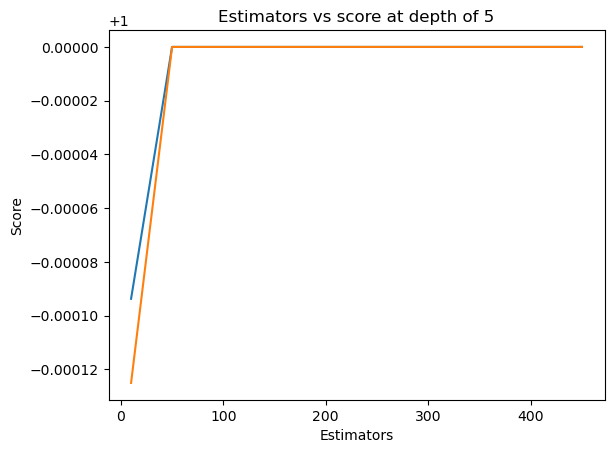

In [7]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 1.0 test Score 1.0
depth =  9 Train Score 1.0 test Score 1.0
depth =  11 Train Score 1.0 test Score 1.0
depth =  15 Train Score 1.0 test Score 1.0
depth =  20 Train Score 1.0 test Score 1.0
depth =  35 Train Score 1.0 test Score 1.0
depth =  50 Train Score 1.0 test Score 1.0
depth =  70 Train Score 1.0 test Score 1.0
depth =  130 Train Score 1.0 test Score 1.0


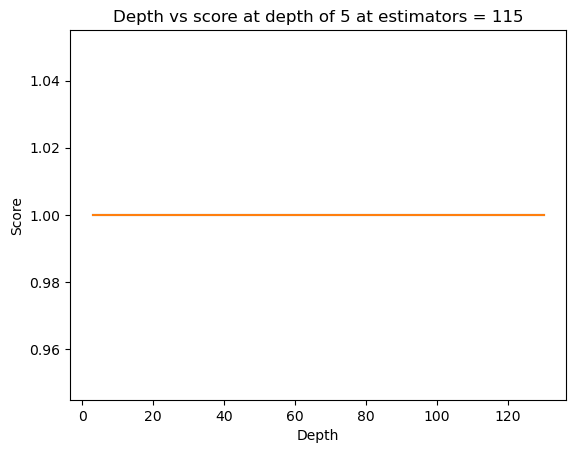

In [8]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [9]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [1. 1. 1. 1. 1.]


KeyError: 'mean_train_score'

In [10]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=51, min_samples_split=125,
                       n_estimators=117, n_jobs=-1, random_state=25)


In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [12]:
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [14]:
tf = pd.read_csv('_kaggle_test_data_with_sh_path_n_all_ft.csv')
tf

,Form,To,src_Indegree,src_Outdegree,Jaccard_Coefficient,follow_back,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,shortest_path
0,3360982,4457271,102,1964,0.036222,0,0.110432,0.022559,0.132990,0.002491,0.243422,0.155549,2.0
1,4761876,4698439,68,123,0.000000,0,0.288675,0.089803,0.378478,0.025924,0.667153,0.468280,4.0
2,4198430,3615486,217,6996,0.000000,0,0.200000,0.011955,0.211955,0.002391,0.411955,0.223910,3.0
3,2945770,747948,210,289,0.004264,0,0.134840,0.058722,0.193562,0.007918,0.328402,0.252284,2.0
4,3950088,3360335,149,1309,0.021918,0,0.084515,0.027629,0.112144,0.002335,0.196660,0.139773,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3116985,2415415,105,449,0.014035,0,0.038925,0.047140,0.086065,0.001835,0.124990,0.133206,2.0
1996,265459,842701,95,3947,0.003521,0,0.068519,0.015915,0.084434,0.001090,0.152953,0.100349,2.0
1997,2547139,4332939,48,131,0.034247,0,0.288675,0.087039,0.375714,0.025126,0.664389,0.462753,2.0
1998,2366264,1815056,10,107,0.008850,0,0.500000,0.096225,0.596225,0.048113,1.096225,0.692450,2.0


In [15]:
y_test_pred = clf.predict(tf)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
arr = np.array(y_test_pred)
zero_count = np.count_nonzero(arr == 0)
print(zero_count)

2000
